In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair Programming Ajuste

### Ana Gonzalez y Ana Campos

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [2]:
df_noesta_nobal = pd.read_pickle("../data-log/02-df_codifcadas_no_estandarizadas.pickle")
df_noesta_nobal.head()


,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,64.0,1,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,1,1.0,46.0,1,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0
2,4.0,1,1.0,64.0,1,30.0,0.0,0.0,0.0,0.0,77.0,241.0,136.5,85.0,26.420000,70.0,0.0
3,7.0,0,4.0,36.0,1,35.0,0.0,0.0,0.0,0.0,63.0,295.0,102.0,68.0,28.150000,60.0,0.0
4,8.0,1,2.0,41.0,1,20.0,0.0,0.0,0.0,0.0,79.0,220.0,126.0,78.0,20.700000,86.0,0.0


In [3]:
df_noesta_nobal.drop('id', axis=1,inplace=True)

In [4]:
df_est_nobal = pd.read_pickle("../data-log/02-df_estandarizadas_codificadas.pickle")
df_est_nobal.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667
2,4.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.071429,1.50,-0.076923,0.120690,0.296296,0.193548,0.208626,-0.333333
3,7.0,0,4.0,1,0.0,0.0,0.0,0.0,0.0,-0.928571,1.75,-1.153846,1.051724,-0.981481,-0.903226,0.555667,-1.000000
4,8.0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,-0.571429,1.00,0.076923,-0.241379,-0.092593,-0.258065,-0.938816,0.733333


In [5]:
df_est_nobal.drop('id', axis=1,inplace=True)

In [6]:
df_est_cod_bal=pd.read_pickle('../data-log/02-bal_est_cod.pickle')
df_est_cod_bal.head(2)

,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,1.0,1,0.0,0.0,1.0,0.0,0.857143,0.25,0.000000,0.155172,0.759259,-0.322581,-0.531595,0.733333,0.0
1,0,1.0,1,0.0,0.0,0.0,0.0,0.571429,1.00,1.692308,0.534483,-0.166667,-0.064516,0.561685,-0.133333,0.0


In [7]:
df_est_cod_bal.duplicated().sum()

0

In [8]:
df_est_cod_bal.isnull().sum()

sex                381
education          495
is_smoking         227
BPMeds             123
prevalentStroke     69
prevalentHyp       265
diabetes            36
age                  0
cigsPerDay           0
glucose              0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
TenYearCHD           0
dtype: int64

Vemos que hay bastantes nulos, ya hemos balanceado la muestra, tenemos ya los datos moficiados, no tenemos tiempo, y dado el tamaño de la muestra, borramos los registros con datos nulos para poder seguir adelante

In [9]:
df_est_cod_bal.shape

(4028, 16)

In [10]:
df_est_cod_bal.dropna(inplace=True)

In [11]:
df_est_cod_bal.isnull().sum()

sex                0
education          0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
age                0
cigsPerDay         0
glucose            0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [12]:
df_est_cod_bal.shape

(2924, 16)

 - Empezamos por el balanceado con tomek, codifcado y estandarizado

In [13]:
# separamos los datos en X e y

X1 = df_est_cod_bal.drop("TenYearCHD", axis = 1)
y1 = df_est_cod_bal["TenYearCHD"]

In [14]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

print(X1.head())
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

print(y1.head())

  sex education is_smoking BPMeds prevalentStroke prevalentHyp diabetes  \
0   1       1.0          1    0.0             0.0          1.0      0.0   
1   0       1.0          1    0.0             0.0          0.0      0.0   
2   0       3.0          0    0.0             0.0          0.0      0.0   
3   0       2.0          1    0.0             0.0          0.0      0.0   
4   1       2.0          0    0.0             0.0          0.0      0.0   

        age  cigsPerDay   glucose   totChol     sysBP     diaBP       BMI  \
0  0.857143        0.25  0.000000  0.155172  0.759259 -0.322581 -0.531595   
1  0.571429        1.00  1.692308  0.534483 -0.166667 -0.064516  0.561685   
2  0.571429        0.00 -0.076923 -0.362069  0.462963  0.516129  1.081244   
3 -0.357143        1.00  0.076923 -0.396552  0.611111  0.387097 -0.399198   
4 -0.714286        0.00 -0.230769  0.327586 -0.055556 -0.903226 -0.419258   

   heartRate  
0   0.733333  
1  -0.133333  
2  -1.000000  
3  -1.000000  
4   0.66666

In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [16]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [17]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
748,0.0,1.0,Train
869,0.0,0.0,Train
2299,0.0,0.0,Train
2226,0.0,0.0,Train
4020,1.0,0.0,Train


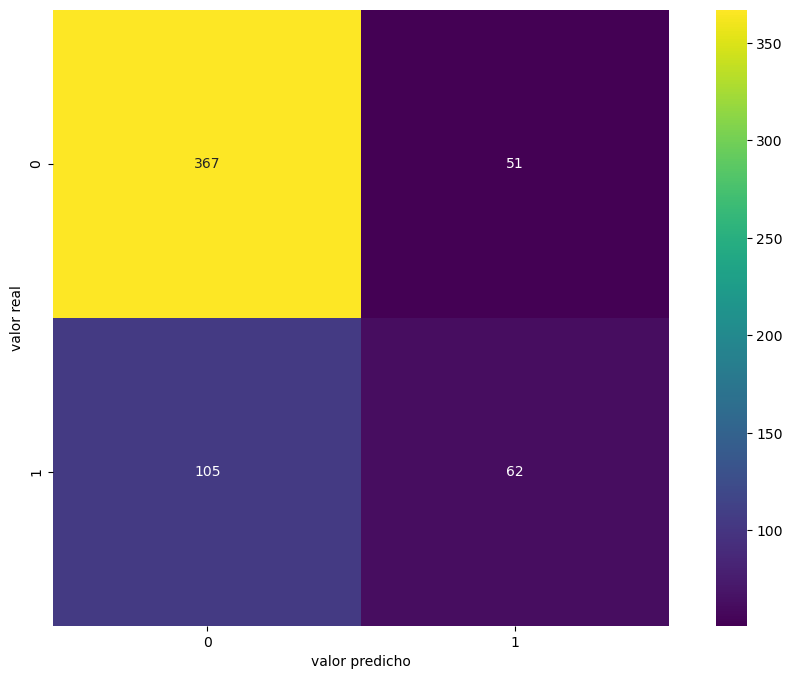

In [18]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Nos da un resultado aceptable si queremos ser proteccionistas, es decir, nos asigna riesgo de enfermedad cunado no la hay, pero, se ajusta bastante bien en dar falsos negativos, lo ideal seria que fuera cercano al 0 en la casilla 01

---

# Realización del modelo con variable no balanceada

 - estandaarizadas y codificadas

In [19]:
df_est_nobal.isnull().sum()

sex                0
education          0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
age                0
cigsPerDay         0
glucose            0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
dtype: int64

In [20]:
# separamos los datos en X e y

X2 = df_est_nobal.drop("TenYearCHD", axis = 1)
y2 = df_est_nobal["TenYearCHD"]

In [21]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

print(X2.head())
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

print(y2.head())

  sex education is_smoking BPMeds prevalentStroke prevalentHyp diabetes  \
0   1       2.0          1    0.0             0.0          0.0      0.0   
1   1       1.0          1    0.0             0.0          0.0      0.0   
2   1       1.0          1    0.0             0.0          0.0      0.0   
3   0       4.0          1    0.0             0.0          0.0      0.0   
4   1       2.0          1    0.0             0.0          0.0      0.0   

        age  cigsPerDay   glucose   totChol     sysBP     diaBP       BMI  \
0  1.071429        0.15  0.153846 -0.224138  0.722222  0.193548  0.136595   
1 -0.214286        0.50  1.230769  0.275862 -0.462963 -0.709677 -1.009027   
2  1.071429        1.50 -0.076923  0.120690  0.296296  0.193548  0.208626   
3 -0.928571        1.75 -1.153846  1.051724 -0.981481 -0.903226  0.555667   
4 -0.571429        1.00  0.076923 -0.241379 -0.092593 -0.258065 -0.938816   

   heartRate  
0   1.000000  
1   0.866667  
2  -0.333333  
3  -1.000000  
4   0.73333

In [22]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [23]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

In [24]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
2378,0.0,0.0,Train
3182,0.0,1.0,Train
921,0.0,0.0,Train
2244,0.0,0.0,Train
3131,0.0,0.0,Train


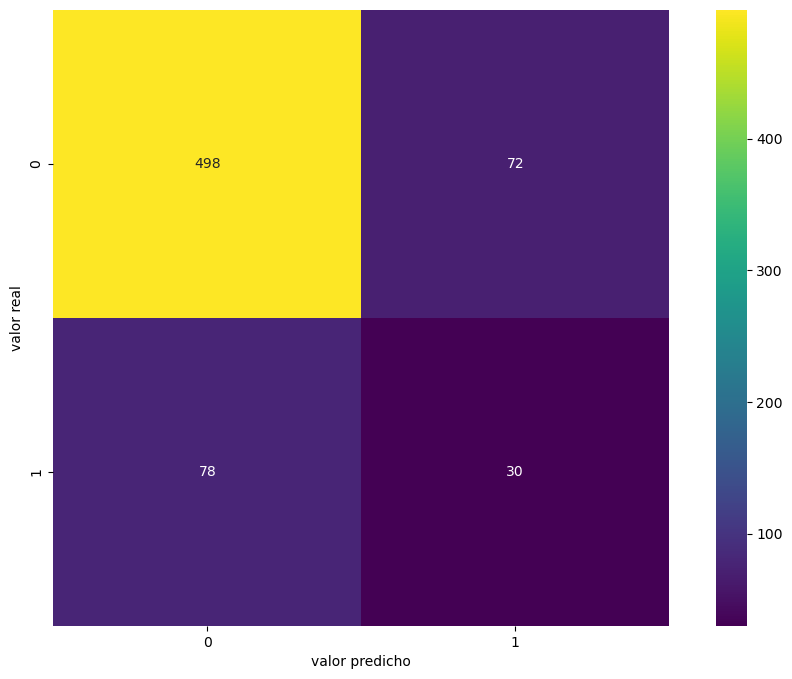

In [25]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

---

 - codificadas, no estandarizadas

In [26]:
df_noesta_nobal.isnull().sum()

sex                0
education          0
age                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
glucose            0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [27]:
# separamos los datos en X e y

X3 = df_est_nobal.drop("TenYearCHD", axis = 1)
y3 = df_est_nobal["TenYearCHD"]

In [28]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

print(X3.head())
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

print(y3.head())

  sex education is_smoking BPMeds prevalentStroke prevalentHyp diabetes  \
0   1       2.0          1    0.0             0.0          0.0      0.0   
1   1       1.0          1    0.0             0.0          0.0      0.0   
2   1       1.0          1    0.0             0.0          0.0      0.0   
3   0       4.0          1    0.0             0.0          0.0      0.0   
4   1       2.0          1    0.0             0.0          0.0      0.0   

        age  cigsPerDay   glucose   totChol     sysBP     diaBP       BMI  \
0  1.071429        0.15  0.153846 -0.224138  0.722222  0.193548  0.136595   
1 -0.214286        0.50  1.230769  0.275862 -0.462963 -0.709677 -1.009027   
2  1.071429        1.50 -0.076923  0.120690  0.296296  0.193548  0.208626   
3 -0.928571        1.75 -1.153846  1.051724 -0.981481 -0.903226  0.555667   
4 -0.571429        1.00  0.076923 -0.241379 -0.092593 -0.258065 -0.938816   

   heartRate  
0   1.000000  
1   0.866667  
2  -0.333333  
3  -1.000000  
4   0.73333

In [29]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [30]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train3,y_train3)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train3 = log_reg_esta.predict(x_train3)

# obtenemos las predicciones para el conjunto de test
y_pred_test3 = log_reg_esta.predict(x_test3)

In [31]:
train_df3 = pd.DataFrame({'Real': y_train3, 'Predicted': y_pred_train3, 'Set': ['Train']*len(y_train3)})
test_df3  = pd.DataFrame({'Real': y_test3,  'Predicted': y_pred_test3,  'Set': ['Test']*len(y_test3)})
resultados3 = pd.concat([train_df3,test_df3], axis = 0)
resultados3.head()

,Real,Predicted,Set
2378,0.0,0.0,Train
3182,0.0,1.0,Train
921,0.0,0.0,Train
2244,0.0,0.0,Train
3131,0.0,0.0,Train


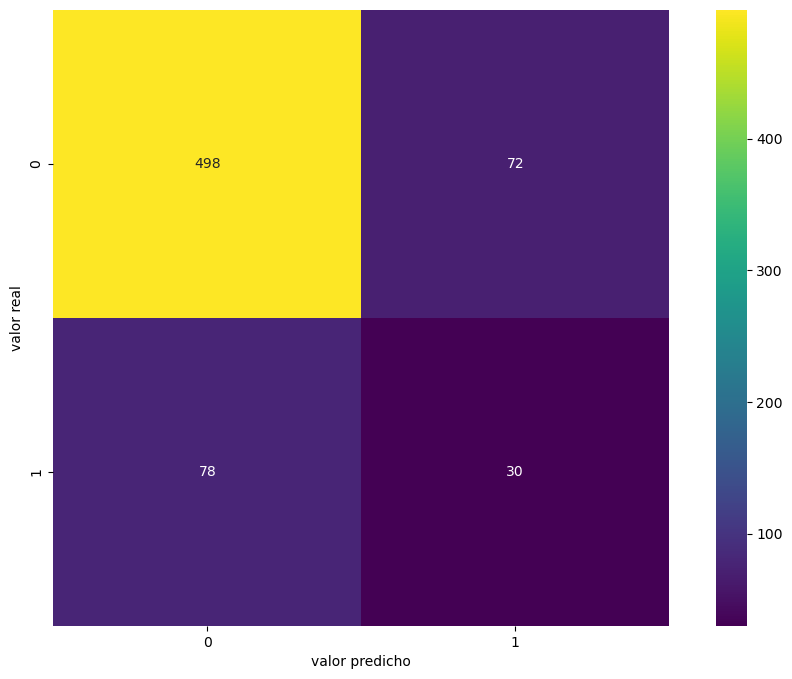

In [32]:
mat_lr3 = confusion_matrix(y_test3, y_pred_test3)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr3, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

## De momento nos quedamos con los datos balanceados, asumimos menos riesgo de dar falsos negativos, o en nuestro caso, dejar pacientes que van a desarrollar la patologia con diagnóstico negativo.